In [73]:
!pip install tensorflow keras
!pip install missingno

In [21]:
#U ovom zadatku fokusirat ću se na izradu modela za višerazrednu klasifikaciju koji će predviđati klasu pretilosti
#na temelju različitih demografskih, prehrambenih i životnih faktora.
#Model će koristiti skup podataka koji sadrži informacije o 
#spolu, dobi, tjelesnoj visini, prehrambenim navikama, učestalosti tjelesne aktivnosti, načinu prijevoza 
#te drugim faktorima koji mogu utjecati na tjelesnu masu.

#Podaci uključuju sljedeće varijable:
#Gender – Spol osobe (Muški/Ženski).
#Age – Dob osobe u godinama.
#Height – Visina osobe u metrima.
#Weight – Težina osobe u kilogramima (ciljna varijabla).
#family_history_with_overweight – Ima li osoba obiteljsku povijest prekomjerne tjelesne težine (Da/Ne).
#FAVC – Konzumira li osoba često visokokaloričnu hranu (Da/Ne).
#FCVC – Učestalost konzumacije povrća (skala od 1 do 3).
#NCP – Broj glavnih obroka dnevno.
#CAEC – Učestalost konzumacije hrane između obroka (Nikada, Ponekad, Često, Uvijek).
#SMOKE – Puši li osoba (Da/Ne).
#CH2O – Dnevni unos vode (skala od 1 do 3).
#SCC – Prati li osoba unos kalorija (Da/Ne).
#FAF – Učestalost tjelesne aktivnosti (skala od 0 do 3).
#TUE – Vrijeme provedeno korištenjem tehnologije (skala od 0 do 3).
#CALC – Učestalost konzumacije alkohola (Nikada, Ponekad, Često, Uvijek).
#MTRANS – Glavni način prijevoza (Automobil, Bicikl, Motor, Javni prijevoz, Pješice).
#NObeyesdad - pretilost



In [75]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("obesity.csv");
data.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [77]:
#pregled statistickih varijabli u tablici
data.describe()

#data.duplicated().count()
#u tablici imamo duplikate ali ja bi ih ostavio jer mozemo imati dva razlicita uzorka sa istim podacima.. nemamo neki jedinstveni identifikator poput ID

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.315964,1.701620,86.586035,2.418986,2.685651,2.008053,1.010313,0.657861
std,6.357078,0.093368,26.191163,0.533996,0.778079,0.612950,0.850613,0.608926
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.630000,65.470000,2.000000,2.660000,1.585000,0.125000,0.000000
50%,23.000000,1.700000,83.000000,2.390000,3.000000,2.000000,1.000000,0.625000
75%,26.000000,1.770000,107.430000,3.000000,3.000000,2.480000,1.670000,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [55]:
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

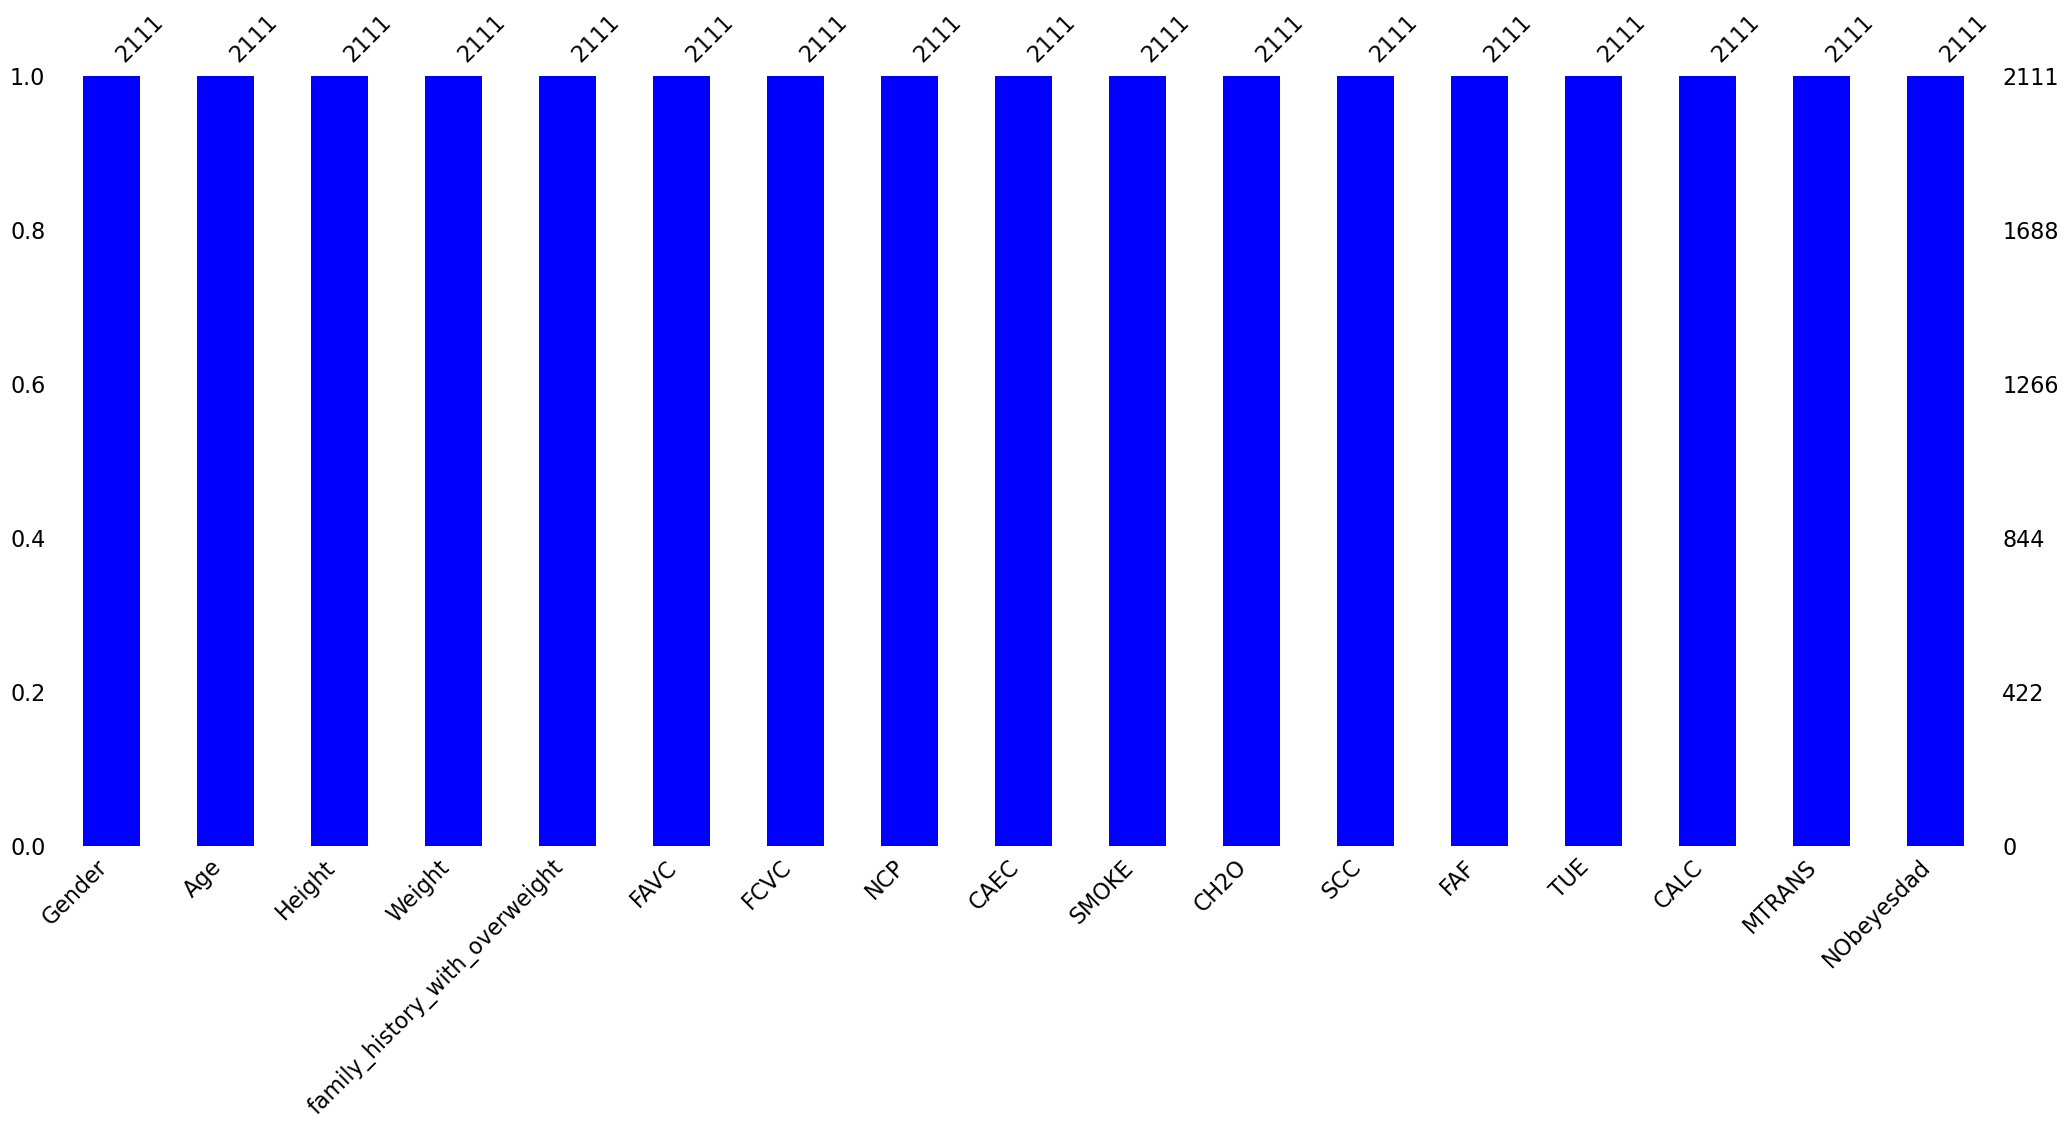

In [61]:
import missingno
import seaborn as sns

missingno.bar(data, color = "b")
plt.show()
#nema podataka koji nedostaju

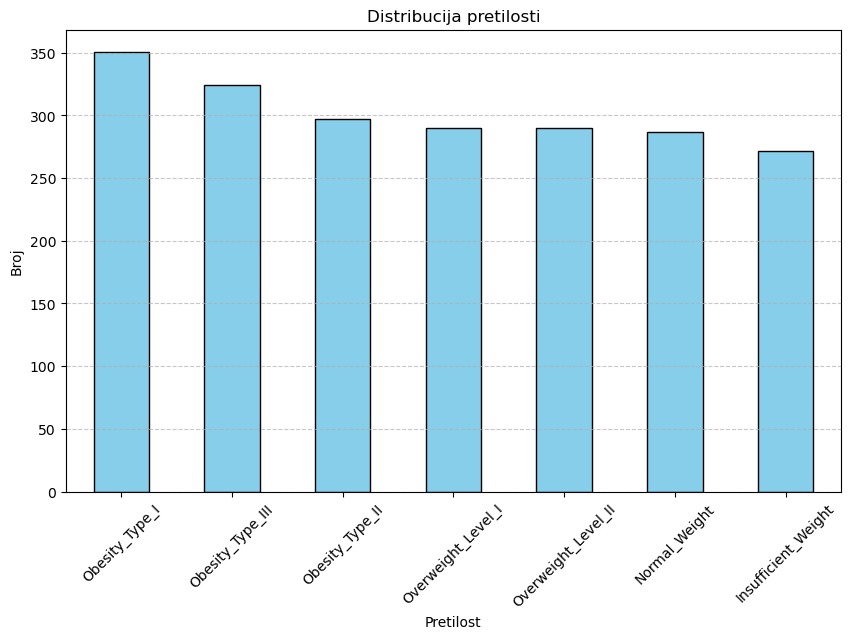

In [79]:
#pregled raspodjele podataka
plt.figure(figsize=(10, 6))
data['NObeyesdad'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Pretilost')
plt.ylabel('Broj')
plt.title('Distribucija pretilosti')
plt.xticks(rotation=45)  # Rotate labels if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)

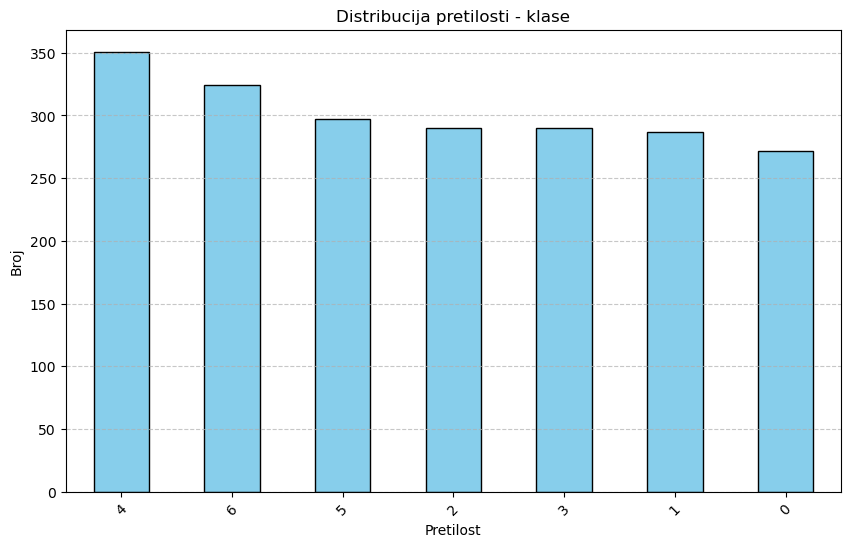

In [87]:
categorical_columns = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']
for cat in categorical_columns:
    data[cat] = data[cat].astype('category').cat.codes
numerical_columns = ['Age', 'Height', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'Weight']


# Ručno mapiranje kategorija pretilosti
target_mapping = {
    "Insufficient_Weight": 0,
    "Normal_Weight": 1,
    "Overweight_Level_I": 2,
    "Overweight_Level_II": 3,
    "Obesity_Type_I": 4,
    "Obesity_Type_II": 5,
    "Obesity_Type_III": 6
}
#data['NObeyesdad'].value_counts(100)
data['NObeyesdad_mapped'] = data['NObeyesdad'].map(target_mapping)

plt.figure(figsize=(10, 6))
data['NObeyesdad_mapped'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Pretilost')
plt.ylabel('Broj')
plt.title('Distribucija pretilosti - klase')
plt.xticks(rotation=45)  # Rotate labels if necessary
plt.grid(axis='y', linestyle='--', alpha=0.7)



In [103]:
data.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,NObeyesdad_mapped
0,0,21,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,Normal_Weight,1
1,0,21,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,Normal_Weight,1
2,1,23,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,Normal_Weight,1
3,1,27,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,Overweight_Level_I,2
4,1,22,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,Overweight_Level_II,3


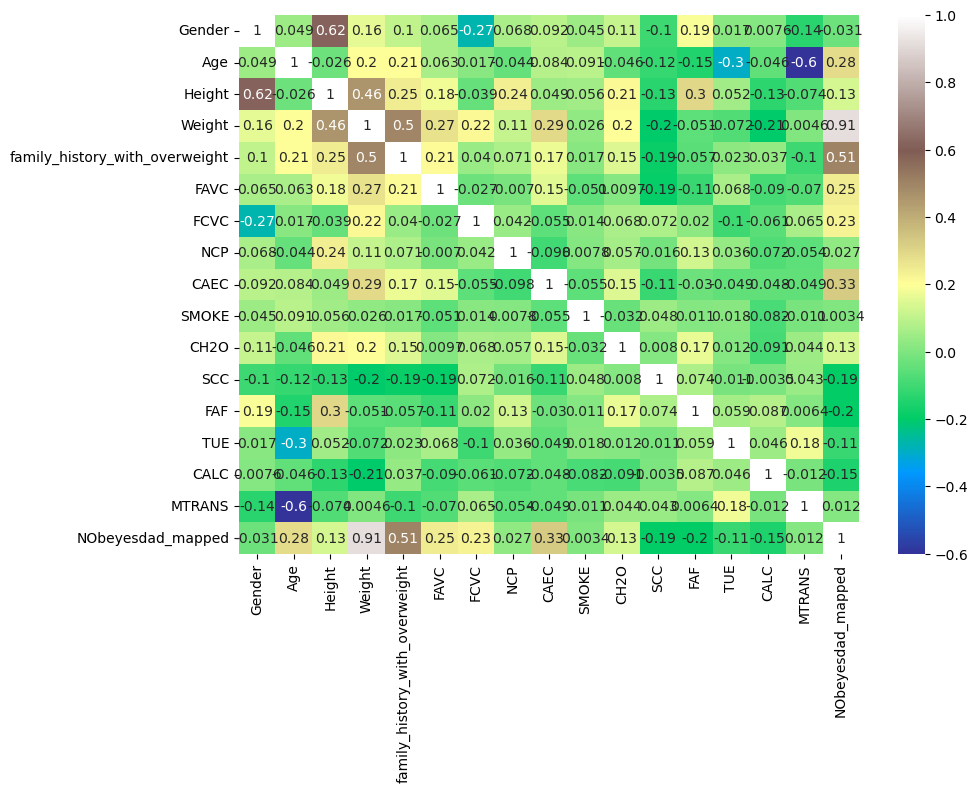

In [107]:
#nakon sto smo odradili pretvaranje tekstualnih vrijednosti poput Male Female u 0 i 1 mozemo pristupiti i korelaciji
#dropamo NObeyesdad  jer on je sadrzan vec u stupcu NObeyesdad_mapped 
dataToCorrelate=data.drop(columns=["NObeyesdad"])
sns.heatmap(dataToCorrelate.corr(), annot=True, cmap='terrain')
fig = plt.gcf()
fig.set_size_inches(10,7)
plt.show()

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'NObeyesdad_mapped'],
      dtype='object')


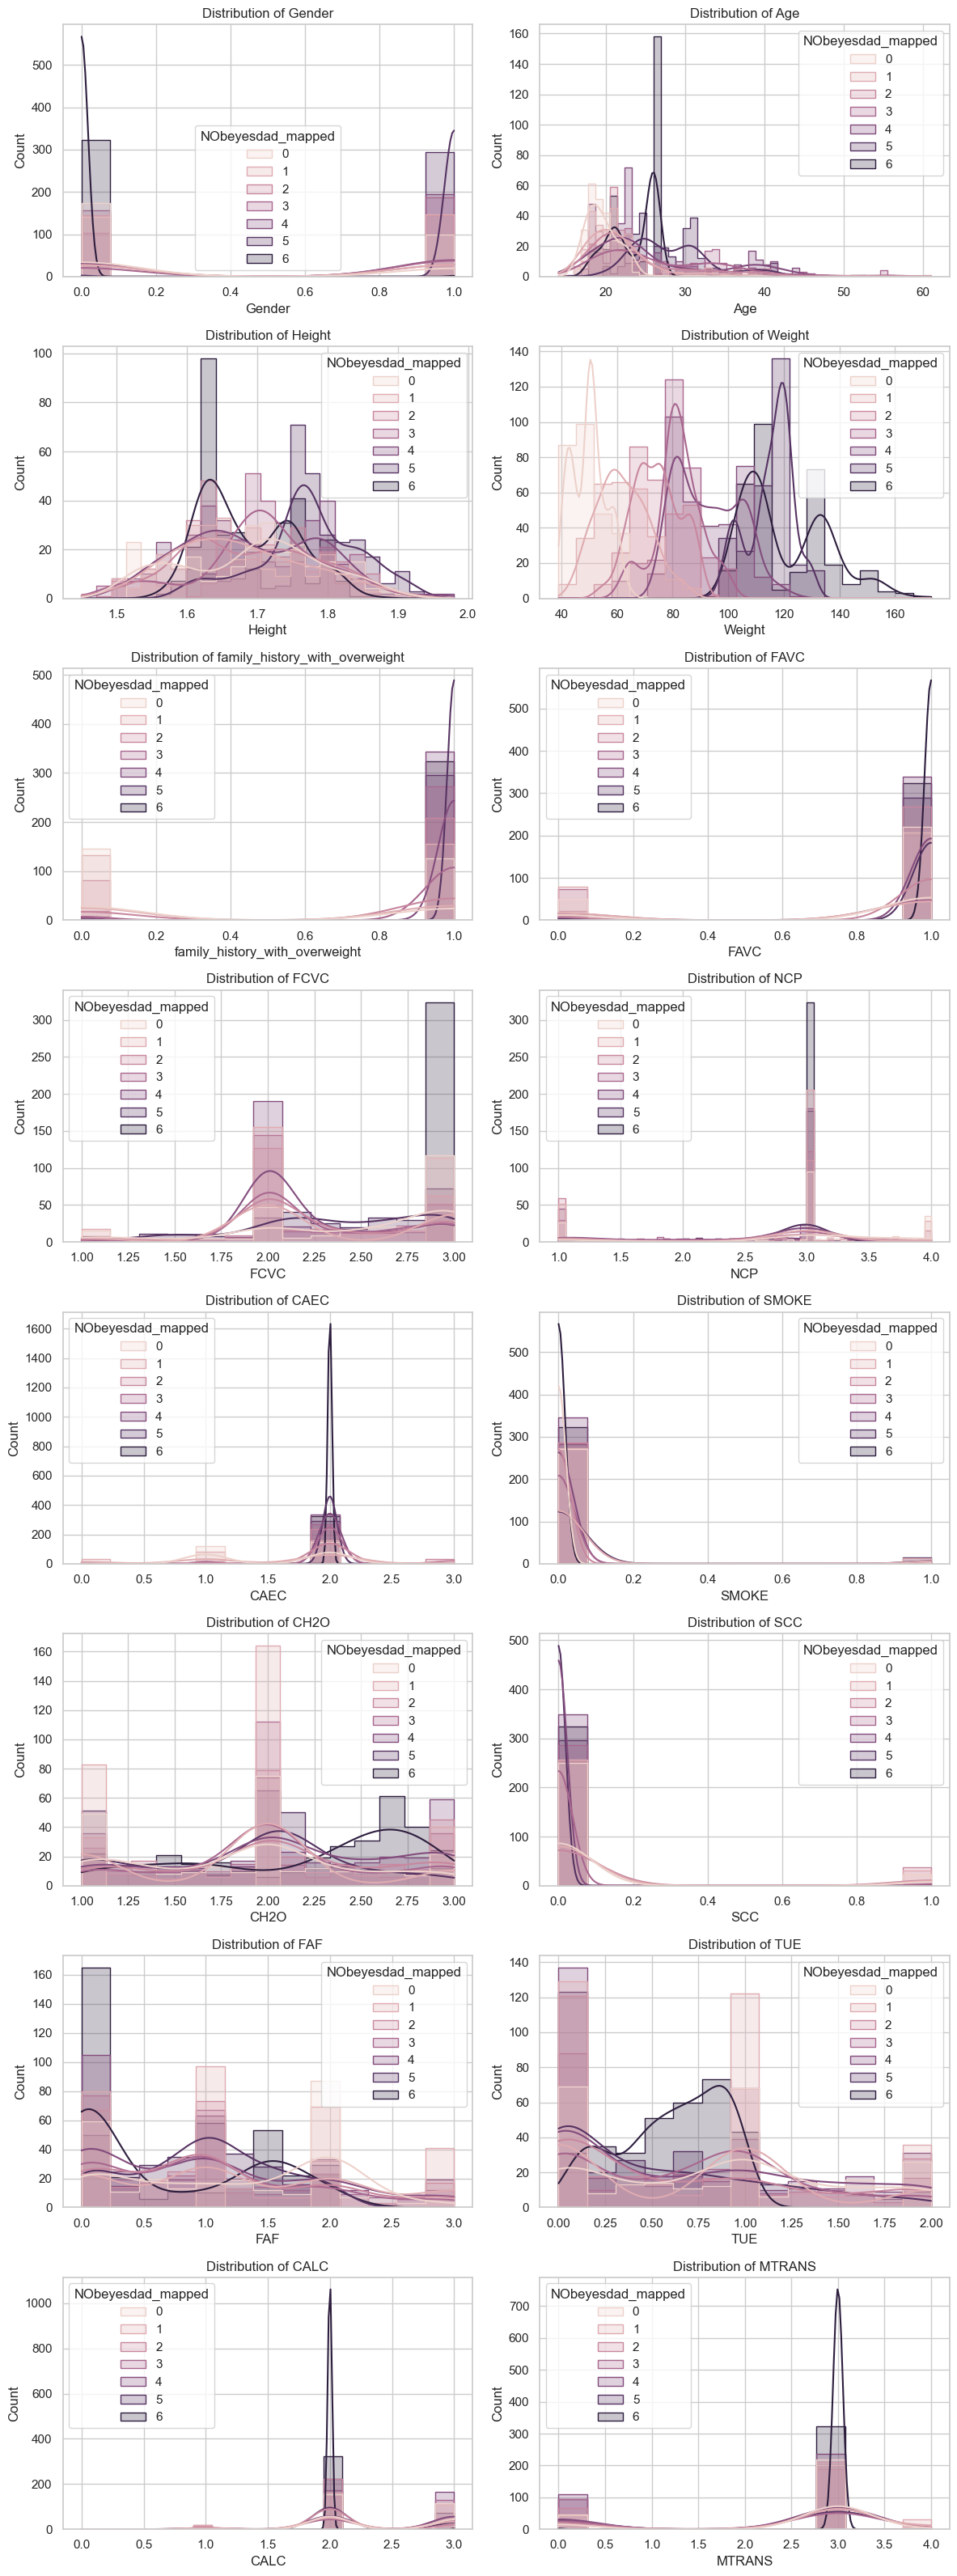

In [139]:
import math

sns.set(style='whitegrid')
print(data.columns)
features = ['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',"SMOKE","CH2O","SCC","FAF","TUE","CALC","MTRANS"]

num_features = len(features)
cols = 2  # 2 plots per row
rows = math.ceil(num_features / cols)  # Calculate required rows

plt.figure(figsize=(12, rows * 4))  # Adjust figure size

for i, feature in enumerate(features):
    plt.subplot(rows, cols, i+1)  # Set rows and 2 columns
    sns.histplot(data=data, x=feature, hue='NObeyesdad_mapped', kde=True, element='step')
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


In [11]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

#kombinacija kategorijskih i numerickih stupaca
X = pd.concat([data[numerical_columns], data[categorical_columns]], axis=1)
y = data['NObeyesdad_mapped']

In [19]:
#kao i prošli puta, jasno je da podaci nemaju istu skalu i da ih moramo skalirati
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#odmah smo podatke skalirali
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train.value_counts()

NObeyesdad_mapped
4    273
6    261
3    240
5    239
2    234
1    225
0    216
Name: count, dtype: int64

In [21]:
# Treniranje modela
models = {
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": GradientBoostingClassifier(n_estimators=50, learning_rate=0.01)
}


In [23]:
#evaulacija modela
konfuzijska_matrica = {
}

for name, model in models.items():
    print(f"Treniram {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    konfuzijska_matrica[name]=confusion_matrix(y_test, y_pred);

    

Treniram KNN...
Treniram RandomForest...
Treniram XGBoost...


Konfuzijska matrica za: KNN:


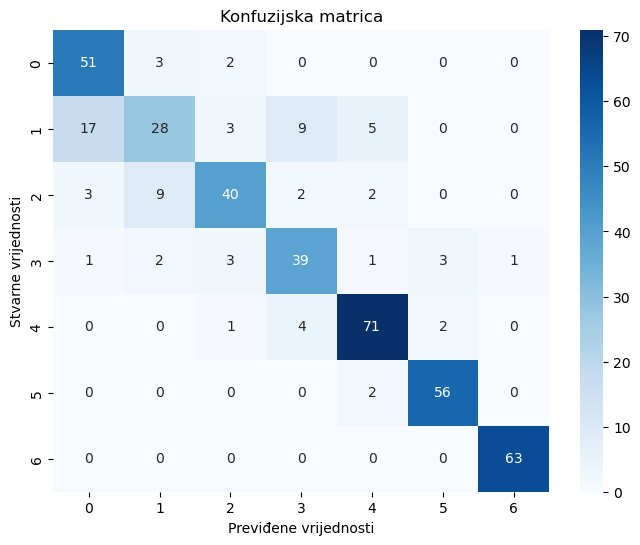

Konfuzijska matrica za: RandomForest:


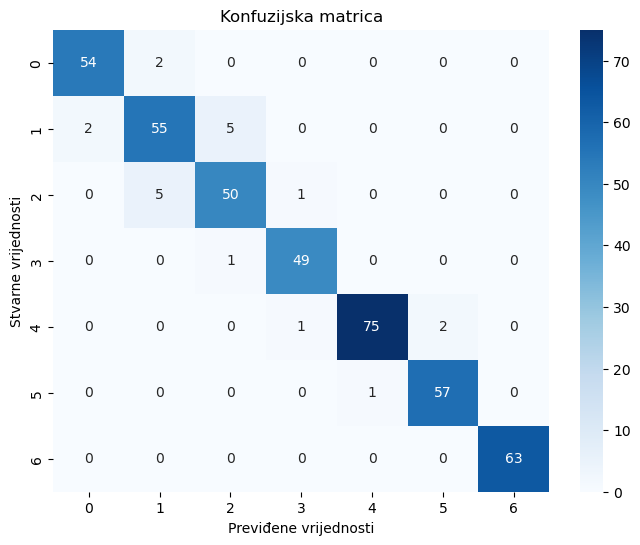

Konfuzijska matrica za: XGBoost:


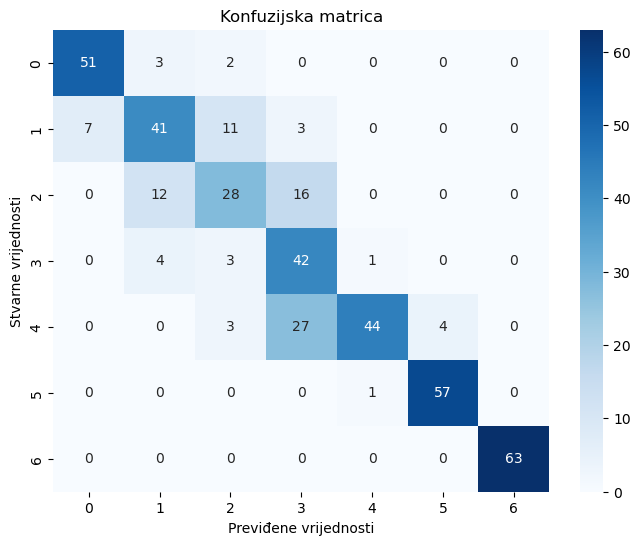

In [25]:
for name, model in models.items():
    print(f"Konfuzijska matrica za: {name}:")
    cm = konfuzijska_matrica[name]
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Previđene vrijednosti')
    plt.ylabel('Stvarne vrijednosti')
    plt.title('Konfuzijska matrica')
    plt.show()

In [ ]:
######DUBOKO UCENJE#####

In [27]:
#priprema podataka 
from keras.utils import to_categorical
y_train_categorical = to_categorical(y_train)

In [28]:
y_train_categorical

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [29]:
from tensorflow import keras
numberOfInputs = X_train.shape[1] 
inputLayer = keras.Input(shape=(numberOfInputs,))

model_klasicni = keras.Sequential([
    inputLayer,  # Prvi skriveni sloj
    keras.layers.Dense(32, activation='relu'),  # Drugi skriveni sloj
    keras.layers.Dense(7, activation='softmax')  # Izlazni sloj (7 klasa → softmax)
])



# Kompajliranje modela
model_klasicni.compile(optimizer='adam',
              loss='categorical_crossentropy'  # Višerazredna klasifikacija → categorical_crossentropy
              )

model_klasicni.fit(X_train, y_train_categorical, batch_size=16, epochs=20)

Epoch 1/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.9139  
Epoch 2/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - loss: 1.4263
Epoch 3/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1791
Epoch 4/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0001
Epoch 5/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9166
Epoch 6/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8604
Epoch 7/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7923
Epoch 8/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7188
Epoch 9/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6524
Epoch 10/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6318
Epoch 11/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5755
Epoch 12/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5307
Epoch 13/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5194
Epoch 14/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4959
Epoch 15/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 

In [30]:
y_pred =  model_klasicni.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)
y_pred

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


array([0, 6, 0, 0, 3, 0, 5, 2, 4, 0, 4, 6, 5, 5, 6, 1, 6, 5, 5, 3, 4, 2,
       6, 4, 1, 3, 3, 6, 6, 0, 6, 3, 2, 1, 0, 6, 4, 1, 1, 1, 1, 5, 3, 1,
       2, 0, 5, 2, 2, 5, 1, 1, 1, 2, 0, 3, 5, 5, 3, 5, 1, 6, 3, 0, 5, 4,
       1, 6, 0, 1, 3, 3, 0, 0, 3, 5, 5, 4, 6, 5, 1, 4, 5, 5, 4, 4, 1, 2,
       1, 3, 1, 5, 0, 1, 4, 0, 1, 4, 1, 5, 4, 4, 6, 4, 3, 4, 1, 6, 6, 5,
       4, 0, 4, 1, 0, 4, 4, 5, 3, 2, 6, 5, 4, 2, 3, 5, 4, 4, 6, 5, 6, 5,
       1, 4, 2, 6, 0, 6, 1, 4, 3, 2, 0, 0, 0, 5, 4, 6, 0, 4, 0, 0, 0, 5,
       4, 1, 1, 3, 0, 0, 0, 1, 4, 0, 5, 0, 5, 2, 2, 3, 2, 1, 5, 6, 4, 3,
       4, 3, 4, 1, 0, 5, 0, 2, 5, 4, 2, 6, 5, 5, 0, 6, 0, 1, 6, 1, 5, 4,
       6, 0, 5, 5, 6, 6, 1, 6, 2, 2, 4, 6, 1, 4, 0, 4, 5, 0, 2, 5, 5, 4,
       6, 3, 5, 2, 5, 3, 0, 6, 1, 2, 2, 6, 1, 2, 2, 4, 4, 4, 4, 0, 3, 3,
       2, 4, 4, 5, 1, 4, 4, 0, 2, 4, 0, 1, 1, 2, 4, 5, 4, 4, 6, 6, 2, 4,
       4, 6, 6, 0, 2, 6, 5, 6, 3, 4, 5, 4, 5, 6, 5, 0, 0, 2, 3, 6, 6, 2,
       4, 3, 0, 5, 4, 2, 0, 4, 0, 2, 5, 5, 3, 4, 1,

Točnost modela: 0.950354609929078


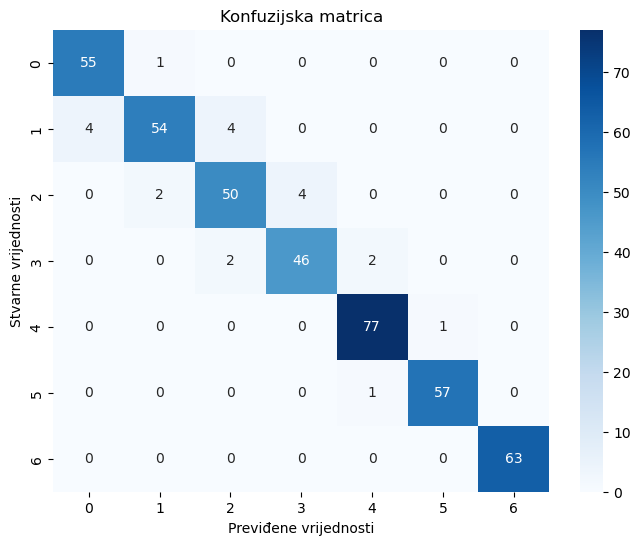

In [38]:
print(f"Točnost modela: {accuracy_score(y_pred,y_test)}")
cm =confusion_matrix(y_test, y_pred);
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previđene vrijednosti')
plt.ylabel('Stvarne vrijednosti')
plt.title('Konfuzijska matrica')
plt.show()

In [41]:
from tensorflow.keras import layers  
numberOfInputs = X_train.shape[1] 
inputLayer = keras.Input(shape=(numberOfInputs,))

model_napredni = keras.Sequential([
    inputLayer,  # Prvi skriveni sloj
    keras.layers.Dense(128, activation='tanh'),  # Drugi skriveni sloj
    layers.Dropout(0.2),  # Dropout sloj sa 20% isključenih neurona kako bi smanjili overfitting
    keras.layers.Dense(64, activation='relu'),  # Drugi skriveni sloj
    keras.layers.Dense(32, activation='relu'),  # Drugi skriveni sloj
    keras.layers.Dense(16, activation='relu'),  # Drugi skriveni sloj
    keras.layers.Dense(7, activation='softmax')  # Izlazni sloj (7 klasa → softmax)
])



# Kompajliranje modela
model_napredni.compile(optimizer='adam',
              loss='categorical_crossentropy'  # Višerazredna klasifikacija → categorical_crossentropy
              )

model_napredni.fit(X_train, y_train_categorical, batch_size=16, epochs=20)
y_pred =  model_napredni.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)

Epoch 1/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.7913  
Epoch 2/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9243
Epoch 3/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5948
Epoch 4/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4083
Epoch 5/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3205
Epoch 6/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2736
Epoch 7/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2230
Epoch 8/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2124
Epoch 9/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1627
Epoch 10/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1589
Epoch 11/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1455
Epoch 12/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1210
Epoch 13/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0999
Epoch 14/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1135
Epoch 15/20
106/106 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - 

Točnost modela: 0.9314420803782506


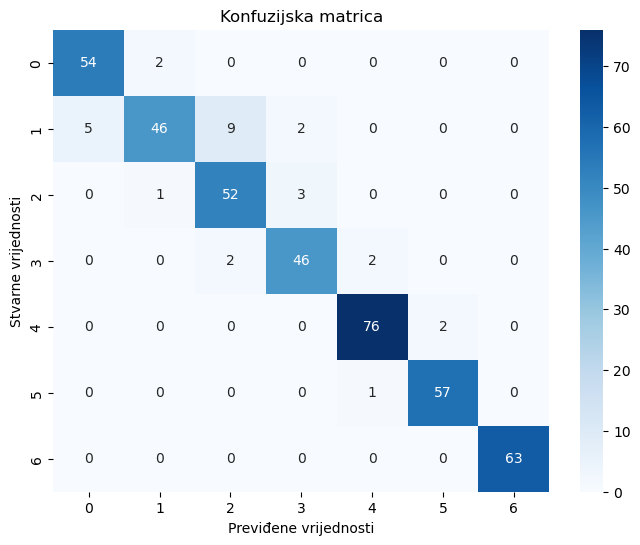

In [43]:
print(f"Točnost modela: {accuracy_score(y_pred,y_test)}")
cm =confusion_matrix(y_test, y_pred);
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Previđene vrijednosti')
plt.ylabel('Stvarne vrijednosti')
plt.title('Konfuzijska matrica')
plt.show()